# Welcome.

This program was created as the final project submission for Spring 2018 Data Structures by Yejee Oh and Olivia Wang. This project utilizes a trie to manipulate and analyze the text streams from various movie scripts.

There are three sections: the code, followed by two interactive features that can be explored by users.

## Section 1: Code

In [2]:
# IMPORTS

import os
import sys
import string
import requests
import bisect
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import HTML
from IPython.display import display
from ipywidgets import interact
from ipywidgets import widgets
from ipykernel.pylab.backend_inline import flush_figures

In [3]:
# CREATE CLASS

class Node(object):
    
    def __init__(N, char: str):
        N.value = char
        N.children = []
        N.end_word = False
        N.count = 1

In [4]:
# INSERT FUNCTION

def insert(root, word: str):

     # Set node equal to root
    node = root

    # Iterate through given word
    for c in word:

        # Keep track of whether or not character is found in children
        in_children = False

        # Set in_children to false if c is not in children nodes
        for child in node.children:

            # If character is in children, point node to child
            if child.value == c:
                node = child
                in_children = True
                break

        # If character is NOT in children, add a new child
        if not in_children:
            next_node = Node(c)
            node.children.append(next_node)
            node = next_node

    # Mark last character as leaf node if not already a word in trie
    if node.end_word == False:
        node.end_word = True
    # If word already exists, increment count
    else:
        node.count += 1

In [5]:
# SEARCH FUNCTION

def search(root, word: str):

    # Set node equal to root
    node = root

    # Check if root has no children
    if not root.children:
        return False

    # Iterate through given word
    for c in word:

        # Keep track of whether or not character is found
        in_children = False

        for child in node.children:

            # If character is found in existing child, set char_found to True
            if child.value == c:
                in_children = True
                node = child
                break

        # If character is not found, return False
        if not in_children:
            return False

    # If not return before, the word has been found; return True
    if node.end_word:
        return True
    else:
        return False

In [6]:
# COUNT FUNCTION

def count(root, word: str):

    # Set node equal to root
    node = root

    # Check if root has no children
    if not root.children:
        return 0
    
    # Iterate through given word
    for c in word:

        # Keep track of whether or not character is found
        in_children = False

        for child in node.children:

            # If character is found in existing child, set char_found to True
            if child.value == c:
                in_children = True
                node = child
                break

        # If character is not found, return False
        if not in_children:
            return 0

    # If not return before, the word has been found; return True
    if node.end_word:
        return node.count
    else:
        return 0


In [7]:
# READ DICTIONARY

# Open file
dict_file = open("words.txt", "r")
dict_text = dict_file.read()
dict_file.close()

# Split words
dictionary = dict_text.split()

# Read dictionary into trie
dict_root = Node('*')
    
for word in dictionary:
    insert(dict_root, word)

In [8]:
# READ TXT FILES

# Create compilation of movie titles
scripts_orig = ["shrek", "finding_nemo", "the_kings_speech", "the_imitation_game", "grown_ups", "white_chicks", "star_wars", "the_martian"]
scripts = [title + ".txt" for title in scripts_orig]

punctuation = "!#$%&()*+,./:;<=>?@[\]^_`{|}~"

# Create dictionary for plotting
data_found = {}
data_total = {}
top_counts = {}

# Open each file
for title in scripts:
    
    # Initialize values
    total_words = 0
    found_words = 0
    
    # Load text
    file = open(title, "r")
    text = file.read()
    file.close()
    
    # Split words
    words = text.split()
    
    # Remove punctuation and make lowercase
    table = str.maketrans('', '', punctuation)
    words = [w.translate(table) for w in words]
    words = [w.lower() for w in words]
    
    # Read script into trie
    script_root = Node('*')
    for word in words:
        insert(script_root, word)
    # Make list unique
    words = list(set(words))
    
    # Create dictionary to store word count
    word_counts = {}
    
    # Search using imported dictionary
    for word in words:
        total_words += 1
        if search(dict_root, word):
            found_words += 1
            
            # Store word counts
            c = count(script_root, word)
            word_counts[word] = c
        
    # Insert into dictionary
    data_found[title] = found_words
    data_total[title] = total_words - found_words
    top_counts[title] = word_counts

## Section 2: Graph

Section 2 is an interactive graph feature where users can manipulate options to visually display the information that corresponds with the applied settings. This section seeks to compare the vocabulary used in each movie by incrementing how many unique words from the movie can be found in a dictionary. This provides a general idea of the literary difficulty (or "intelligence") of each movie script, and may be a reflection of the movie genre. For example, the genres that used the most large variety of words from the dictionary were the documentaries and science-fiction movies, while the genres that used the smallest variety of words from the dictionary were the children's movies and adult comedy movies. 

In [9]:
def plot_scripts(data_found):
    # Add controls
    selection = widgets.Dropdown(description = "Movie(s):")
    titles = list(data_found.keys())
    titles.append("All")
    selection.options = titles
    display(selection)
    
    # Plot data
    def clicked_button(b):
        if (selection.value == "All"):
            
            # Plot data
            fig, ax = plt.subplots(1,1,figsize=(18, 8))
            movies = data_found.keys()
            words = data_found.values()
            ax.bar(movies, words, color = 'b')
            plt.legend(bbox_to_anchor=(.5,1), loc="upper left")
            plt.show()
        else:
            # Plot data
            fig, ax = plt.subplots(1,1,figsize=(1, 8))
            movies = selection.value
            words = data_found[selection.value]
            ax.bar(movies, words, color = 'b')
            plt.legend(bbox_to_anchor=(.5,1), loc="upper left")
            plt.show()
    
    # Button controls
    button = widgets.Button(description = "Make graph")
    display(button)
    button.on_click(clicked_button)

In [10]:
def plot_scripts_compare(data_found, data_total):
    # Plot data
    fig, ax = plt.subplots(1,1,figsize=(18, 8))
    movies = data_found.keys()
    found_words = []
    total_words = []
    for movie in movies:
        f = data_found[movie]
        t = data_total[movie]
        total = f + t
        found_words.append(f * 100.0 / total)
        total_words.append(t * 100.0 / total)
            
    ax.bar(movies, found_words, color='b', label='Found words')
    ax.bar(movies, total_words, bottom=found_words, color = 'r', label='Not found words')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

The function plot_scripts_compare() shows the percentage of words that were in the movie scripts that were found in the dictionary. The red portion is the percentage of words that were not in the dictionary, and the blue portion is the percentage of words that are in the dictionary.

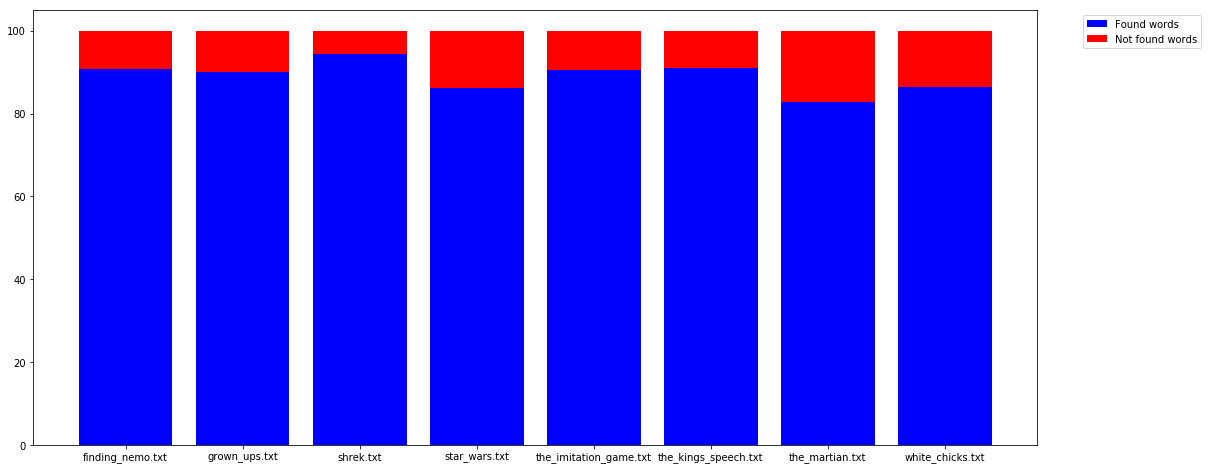

In [11]:
plot_scripts_compare(data_found, data_total)

The function plot_scripts() shows the number of words in the movie that were found in the dictionary. The user can select which individual movie to look at or can display all of the movies in one graph.

A Jupyter Widget

A Jupyter Widget

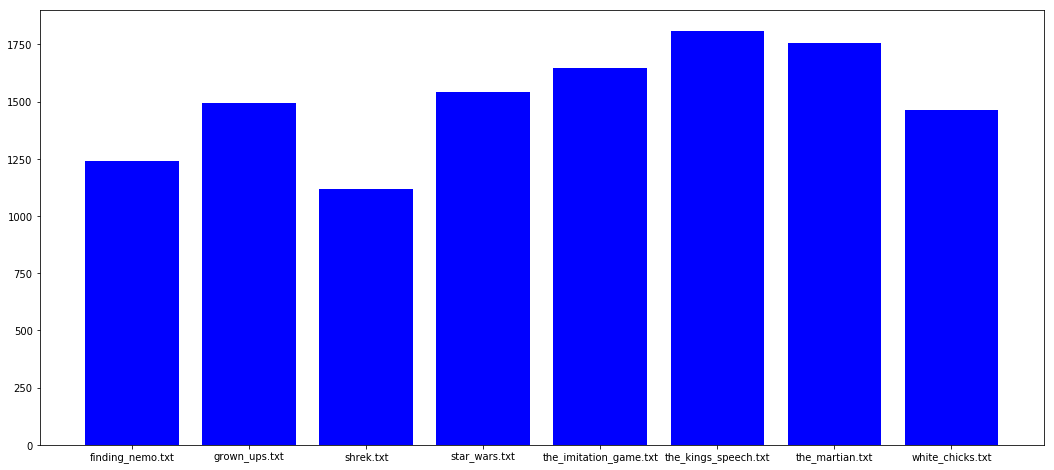

In [12]:
plot_scripts(data_found)

# Section 3: List

This section makes use of the count() function of the trie. There is an interactive table that users can manipulate, which has three features: a dropdown to select the movie, a checkbox, and a slider to choose how many items to show in the table. The table displays the most-frequently (or least-frequently) used words in each script in order, and users can reverse the order by checking the checkbox labeled "reverse".

In [13]:
def display_top_counts(word_counts='', limit=20, reverse=True):
    
#     # Add controls
#     selection = widgets.Dropdown(description = "Movie(s):")
#     titles = list(data_found.keys())
#     titles.append("All")
#     selection.options = titles
#     display(selection)
    
#     print(selection.value)
        
    # Sort word counts
    sorted_word_counts = sorted(word_counts, key=word_counts.__getitem__, reverse=reverse)[:limit]
    #for k in sorted_word_counts:
        #print("{} : {}".format(k, word_counts[k]))
        
    # Start html formatting
    html = '<table><tbody>'
    
    # Loop through posts
    for index, w in enumerate(sorted_word_counts):
        word = w
        count = word_counts[w]
        
        # Continue formatting
        html += f'''
        <tr>
            <td style="text-align: left">{index + 1}.</td>
            <td style="text-align: left">{word}</a></td>
            <td style="text-align: left">{count}</td>
        </tr>
        '''
    html += '<table><tbody>'
    display(HTML(html))

In [14]:
interact(display_top_counts, word_counts=top_counts, limit=(1, 40))

A Jupyter Widget

<function __main__.display_top_counts>